In [1]:
## We are importing all of the packages that we will need to do this exercise
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

Iris dataset from UCI: https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
## Import the data
file_name = 'iris.csv'
try:
    iris = pd.read_csv(f"datasets/{file_name}", sep = ',')
    iris.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width','class']
    print(f'{file_name} successfully loaded')
except:
    print(f'{file_name} file not found. Please upload to datasets folder')

iris.csv successfully loaded


In [3]:
## Change strings to integers
iris = iris.replace('Iris-setosa',0)
iris = iris.replace('Iris-versicolor',1)
iris = iris.replace('Iris-virginica',2)

In [4]:
iris.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


Break the data up into X and y. This is important because we will be using X to classify y. We want to use the four features (sepal_len, sepal_width, petal_len, petal_width) to classify which of the three classes a given flower is. 

In [5]:
X = iris[['sepal_len','sepal_width','petal_len','petal_width']]
y = iris['class']

We need to randomly split the data up into testing and training sets. Setting random_state equal to 1 is like setting a seed in R. It does not matter what it is set to, as long as it is the same each time that we run the code for reproducibility.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We build the initial model with k = 5, which is denoted by the n_neighbors argument of KNeighborsClassifier. This means that the algorithm will be using the 5 nearest neighbors to decide what class a given case should be.

In [7]:
knn = KNeighborsClassifier(n_neighbors = 5)

This is how we train the model. Note, KNN is a nonparametric model, and it does not make any assumptions about the distribution of the data.

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Now, we want to get the predicted values from the test set. We also want to see how accurate our model is which is accomplished by getting knn.score, and we just print it in a way that looks nice. We see that our predictions are 97.37% correct, in other words, of the 38 observations in the test set, 37 of the classifications were correct. 

In [9]:
## len(X_test) = 38 
y_pred = knn.predict(X_test)
print('accuracy:', knn.score(X_test, y_test))

accuracy: 0.9736842105263158


Next, we want to use k-fold cross validation, where the original sample is broken up into k equally sized subsamples. We are starting with the same k = 5 model as above.

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5)

This breaks the data into 5 subsamples and it cycles through, giving each of the subsamples the opportunity to be the test set. We will still be using k = 5 for the number of neighbors looked at. For example, one of the iterations will have 2,3,4,5 as the training set, and 5 will be the test set. We then get the accuracy for each of the iterations in an array and take the average in order to get a better idea of the accuracy. Here, we see that the average accuracy for these iterations is 97.33%.

In [11]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.9733333333333334


Now, we want to cycle through many different numbers of subsamples, which we will do via a for loop. We first have to create a range of k's that we want to look at, which is 1-30. That is, we will will be changing the number of neighbors that we are looking at in each iteration of the for loop. We will still be breaking the data up into 5 subgroups like we did above, and we will be storing the accuracy and neg_mean_squared_error (MSE) of each of the different k's empty lists, cv_acc and cv_loss. Accuracy, in other words, the number of correct classifications over total number of attempted classifications, is one way that we can judge the effectiveness of a model. Like with a regression, we want to minimize the MSE value. 

We want to maximize accuracy and minimize MSE. In the plot that is produced, we can see that accuracy peaks and MSE in minimized between k = 6 and k = 12. There is a pretty steep decline (increase) in the accuracy (MSE) once we pass 12, this is likely due to underfitting. In other words, the model's ability to predict the class of a flower is declining as k is increased. 

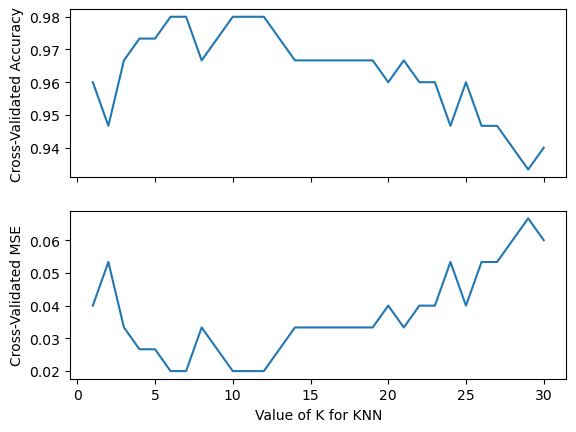

In [12]:
k_range = range(1, 31) 

acc_scores = []
loss_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_acc = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_loss = abs(cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error'))
    
    acc_scores.append(cv_acc.mean())
    loss_scores.append(cv_loss.mean())

    
fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].plot(k_range, acc_scores)
axs[0].set_ylabel('Cross-Validated Accuracy')

axs[1].plot(k_range, loss_scores)
axs[1].set_xlabel('Value of K for KNN')
axs[1].set_ylabel('Cross-Validated MSE')
plt.show()

Based on the analysis of both the accuracy and MSE scoring. I would use k = 6 as the optimal k for the model. I am picking the least of the five suggested because this would be the least computationally expensive. Since the five options provide the same quality in terms of high accuracy and low MSE, it makes sense to me to pick the option that would provide this at the lowest computational cost. As k is increased, the number of points that must have their distance computed also increases, which makes the model run slower. 